In [1]:
import altair as alt
from bayes_window.generative_models import *
from bayes_window.visualization import plot_data, plot_data_slope_trials
from bayes_window import BayesWindow, models, workflow
from importlib import reload
alt.renderers.enable('altair_saver', fmts=['png']);

In [2]:
df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=40,
                                                                n_neurons=3,
                                                                n_mice=4,
                                                                dur=7,
                                                                mouse_response_slope=16)
df['log_isi'] = np.log10(df['isi'])


# data_details with posterior slopes

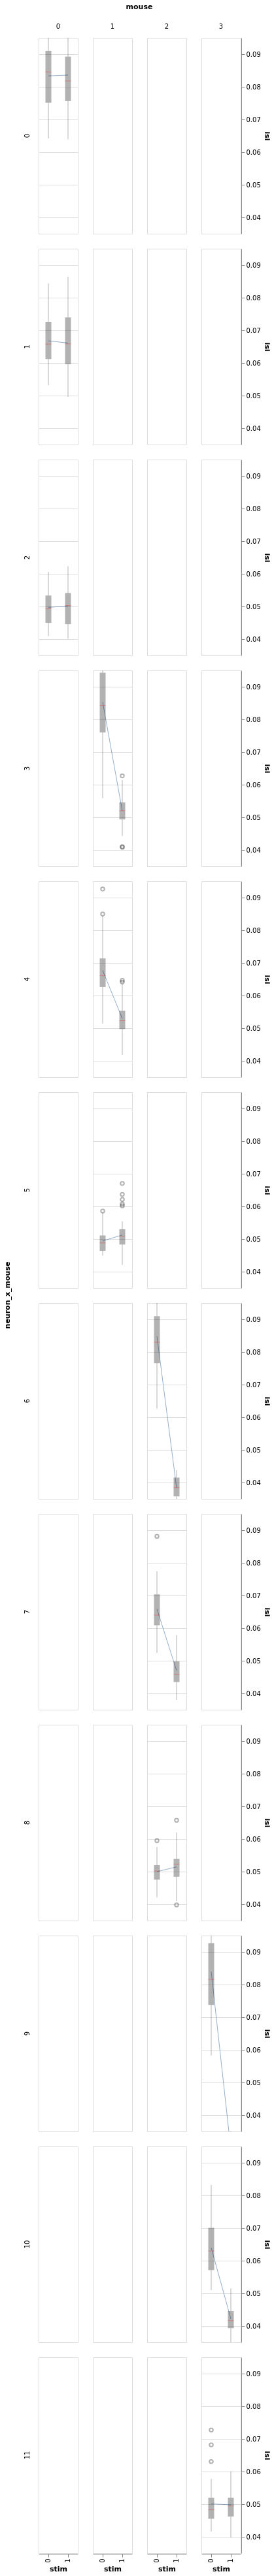

In [56]:

reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse')#, detail='i_trial')
bw.chart_data_box_detail

In [57]:
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',)
assert bw.data_and_posterior.dropna(subset=['mu_intercept_per_group center interval'])['mouse'].unique().size==4

We lost some detail in the data. This does not matter for posterior, but plotting data may suffer. Did was there another index column (like i_trial) other than ['neuron_x_mouse', 'mouse', 'combined_condition']?


AssertionError: 

In [14]:
bw.data_and_posterior[bw.group].unique()

array(['m0bayes', 'm1bayes', 'm2bayes', 'm3bayes'], dtype=object)

In [15]:
bw.group

'mouse'

In [16]:
self=bw

In [17]:
bw.trace.posterior['mu_intercept_per_group'].mean(['chain','draw'])


<xarray.DataArray 'mu_intercept_per_group' (mouse: 4)>
array([80.33646 , 81.06599 , 80.391914, 79.3304  ], dtype=float32)
Coordinates:
  * mouse    (mouse) int64 0 1 2 3

In [18]:
bw.data_and_posterior

,index,neuron_x_mouse,mouse,i_trial,combined_condition,mu_intercept_per_group higher interval,mu_intercept_per_group lower interval,mu_intercept_per_group center interval,sigma_intercept_per_group higher interval,sigma_intercept_per_group lower interval,...,sigma_obs higher interval,sigma_obs lower interval,sigma_obs center interval,sigma_slope_per_condition higher interval,sigma_slope_per_condition lower interval,sigma_slope_per_condition center interval,higher interval,lower interval,center interval,isi diff
0,0,m0bayes0,m0bayes,0,0,140.231155,18.109016,76.678295,0.002156,0.000361,...,0.013233,0.012098,0.012722,0.000317,0.000085,0.000159,167.646667,42.367676,77.863616,-0.009982
1,1,m0bayes0,m0bayes,1,0,140.231155,18.109016,76.678295,0.002156,0.000361,...,0.013233,0.012098,0.012722,0.000317,0.000085,0.000159,167.646667,42.367676,77.863616,0.007046
2,2,m0bayes0,m0bayes,2,0,140.231155,18.109016,76.678295,0.002156,0.000361,...,0.013233,0.012098,0.012722,0.000317,0.000085,0.000159,167.646667,42.367676,77.863616,0.000214
3,3,m0bayes0,m0bayes,3,0,140.231155,18.109016,76.678295,0.002156,0.000361,...,0.013233,0.012098,0.012722,0.000317,0.000085,0.000159,167.646667,42.367676,77.863616,-0.034851
4,4,m0bayes0,m0bayes,4,0,140.231155,18.109016,76.678295,0.002156,0.000361,...,0.013233,0.012098,0.012722,0.000317,0.000085,0.000159,167.646667,42.367676,77.863616,-0.006098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,475,m3bayes2,m3bayes,35,11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-36.490528,-155.135193,-71.296223,0.000195
476,476,m3bayes2,m3bayes,36,11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-36.490528,-155.135193,-71.296223,0.002815
477,477,m3bayes2,m3bayes,37,11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-36.490528,-155.135193,-71.296223,-0.006006
478,478,m3bayes2,m3bayes,38,11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-36.490528,-155.135193,-71.296223,-0.000256


In [19]:
bw.data_and_posterior['mu_intercept_per_group center interval'].unique()

array([76.67829492, 77.29953901, 76.9935765 , 75.38175834,         nan])

In [50]:
bw.data_and_posterior.dropna(subset=['mu_intercept_per_group center interval'])['mouse'].unique()

array(['m0bayes', 'm1bayes'], dtype=object)

In [20]:
first_treat=self.original_data[self.treatment].unique()[0]
self.data_and_posterior[self.treatment]=first_treat# Maybe optional


data_treatment0=self.original_data[self.original_data[self.treatment]==first_treat]
# pd.concat([data_treatment0.set_index('combined_condition'), self.data_and_posterior.set_index('combined_condition')],axis=1)

levels=self.levels+[self.detail, 'combined_condition']
# levels=['combined_condition', self.detail, self.group]
#pd.concat([data_treatment0.set_index(levels), self.data_and_posterior.set_index(levels)],axis=1)

data_treatment0 = data_treatment0.set_index(levels).join(self.data_and_posterior.set_index(levels), 
                                                         on=levels, rsuffix='extra').reset_index()
# data_treatment0.set_index(levels)

In [21]:
list(set(self.levels) - {self.treatment})

['neuron_x_mouse', 'mouse']

In [22]:
self.data_and_posterior.mouse.unique()

array(['m0bayes', 'm1bayes', 'm2bayes', 'm3bayes'], dtype=object)

In [29]:
full_data_with_posterior = pd.concat([data_treatment0, 
                                      self.original_data[self.original_data[self.treatment]!=first_treat]])
full_data_with_posterior[['mu_intercept_per_group center interval', 'mouse','neuron_x_mouse']]

,mu_intercept_per_group center interval,mouse,neuron_x_mouse
0,76.678295,m0bayes,m0bayes0
1,76.678295,m0bayes,m0bayes0
2,76.678295,m0bayes,m0bayes0
3,76.678295,m0bayes,m0bayes0
4,76.678295,m0bayes,m0bayes0
...,...,...,...
951,NaN,m3bayes,m3bayes2
953,NaN,m3bayes,m3bayes2
955,NaN,m3bayes,m3bayes2
957,NaN,m3bayes,m3bayes2


In [31]:
full_data_with_posterior.neuron_x_mouse.unique()

array(['m0bayes0', 'm0bayes1', 'm0bayes2', 'm1bayes0', 'm1bayes1',
       'm1bayes2', 'm2bayes0', 'm2bayes1', 'm2bayes2', 'm3bayes0',
       'm3bayes1', 'm3bayes2'], dtype=object)

In [24]:
full_data_with_posterior['mu_intercept_per_group center interval'].unique()

array([76.67829492, 77.29953901, 76.9935765 , 75.38175834,         nan])

In [49]:
full_data_with_posterior.dropna(subset=['mu_intercept_per_group center interval'])['mouse'].unique()

array(['m0bayes', 'm1bayes'], dtype=object)

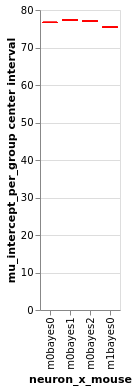

In [45]:
posterior_intercept=alt.Chart(full_data_with_posterior.dropna(subset=['mu_intercept_per_group center interval'],how='any')).mark_tick(color='red').encode(
x='neuron_x_mouse',
y='mu_intercept_per_group center interval')
posterior_intercept#.facet(column='')

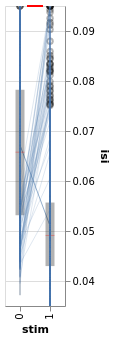

In [35]:
(self.data_box_detail(data=full_data_with_posterior,autofacet=False)+posterior_intercept)#.resolve_scale(y='independent')

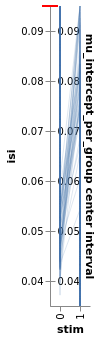

In [38]:
(self.chart_data_detail+posterior_intercept).resolve_axis(y='independent')#.facet(column='mouse')

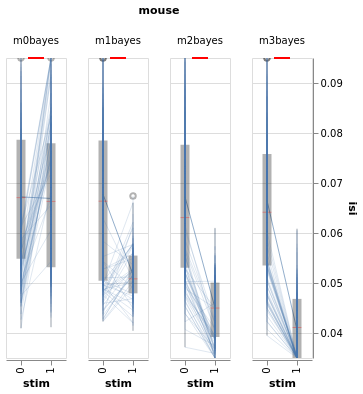

In [21]:
(self.data_box_detail(data=full_data_with_posterior,autofacet=False)+posterior_intercept).facet(column='mouse')

In [22]:
from bayes_window.utils import fill_row
df_data = self.data_and_posterior
df_bayes=self.data
posterior_index_name='combined_condition'
data=pd.concat([fill_row(group_val, data_rows, df_bayes, posterior_index_name)
                  for group_val, data_rows in df_data.groupby([posterior_index_name])])

In [23]:
self.chart_data_box_detail+

SyntaxError: invalid syntax (<ipython-input-23-117874cac15c>, line 1)

TODO fill in original conditions something like this:

In [ ]:
data

In [ ]:
df_result=data
if ('combined_condition' in self.original_data.columns) and ('combined_condition' in df_result.columns):
    levels_to_replace = list(set(self.levels) - {self.treatment})
    for level_values, data_subset in self.original_data.groupby(levels_to_replace):
        if not hasattr(level_values, '__len__'):  # This level is a scalar
            level_values = [level_values]
        for level_name, level_value in zip(levels_to_replace, level_values):
            df_result.loc[df_result['combined_condition'] == data_subset['combined_condition'].iloc[0],
                          level_name] = level_value        # sanity check:


In [ ]:
posterior_intercept=alt.Chart(self.data_and_posterior).mark_bar(color='red').encode(
#x='dummy_x',
y='mu_intercept_per_group center interval')


(posterior_intercept+ self.chart_data_detail)#.facet(column=self.group)

In [ ]:
self.data_box_detail(data=self.data_and_posterior)

# data_details

In [ ]:
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', detail='i_trial')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse', 'i_trial'));

In [ ]:

reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron', group='mouse', detail='i_trial')
# bw.plot(x='neuron',color='stim',detail='i_trial',add_box=False).facet(column='mouse',)
bw.chart_data_box_detail

# Create_data_slopes

This should trigger a warning. 'i_trial' in detail=

In [ ]:
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', )
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse',));
bw.chart_posterior


No warning should be displayed below:

In [ ]:
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', detail='i_trial' )
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract')

bw.chart_posterior


# data_details

In [ ]:
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', detail='i_trial')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse', 'i_trial'));

In [ ]:

reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron', group='mouse', detail='i_trial')
# bw.plot(x='neuron',color='stim',detail='i_trial',add_box=False).facet(column='mouse',)
bw.chart_data_box_detail

## Without detail:

In [ ]:

reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron', group='mouse', )
# bw.plot(x='neuron',color='stim',detail='i_trial',add_box=False).facet(column='mouse',)
bw.chart_data_box_detail

# Create_posterior_charts

In [ ]:
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse', 'i_trial'))
bw.create_posterior_charts(x='neuron:O',column='mouse')

In [ ]:
bw.chart_posterior

## More manual faceting and composing

In [ ]:
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse', 'i_trial'))
bw.create_posterior_charts(x='neuron:O')

In [ ]:
x='neuron'
y='isi diff'
alt.Chart(bw.data_and_posterior).mark_boxplot(
            clip=True, opacity=.3, size=9, color='black',
            median=alt.MarkConfig(color='red', strokeWidth=20)
        ).encode(
            x=x,
            y=alt.Y(f'{y}:Q',
                    axis=alt.Axis(orient='right', title=''),
                    )
        )

In [ ]:
bw.chart_data_boxplot.facet(column='neuron_x_mouse')

In [ ]:
(bw.chart_posterior+bw.chart_data_boxplot).facet(column='mouse')

Fix:

In [ ]:
from bayes_window.visualization import facet
facet(alt.layer(bw.chart_data_boxplot,bw.chart_posterior).resolve_scale(y='independent'), 'mouse')

In [ ]:
facet((bw.chart_data_boxplot+bw.chart_posterior).resolve_scale(y='independent'), 'mouse')

In [ ]:
#bw.facet(bw,column='mouse_code')

In [ ]:
bw.charts[2]

In [ ]:
alt.layer(*bw.charts).resolve_scale(y='independent')

In [ ]:
bw.chart_posterior|bw.chart_data_boxplot|bw.chart_posterior_kde

If x axis, can't use `+`. Must call `alt.layer()`:

In [ ]:
(bw.chart_data_boxplot+bw.chart_posterior).resolve_scale(y='independent')

In [ ]:
(bw.chart_posterior+bw.chart_data_boxplot).facet(column='mouse').resolve_scale(y='independent')

In [ ]:
alt.layer(bw.chart_posterior,bw.chart_data_boxplot).resolve_scale(y='independent')

In [ ]:
bw.plot(x='neuron:O')

In [ ]:
df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=5,
                                                                n_neurons=3,
                                                                n_mice=4,
                                                                dur=7,
                                                                mouse_response_slope=16)

reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron', group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron'))
bw.create_posterior_charts()

In [ ]:
alt.layer(*bw.charts)

In [ ]:
alt.layer(*bw.charts_for_facet).facet(column='neuron')

In [ ]:
(bw.chart_posterior+bw.chart_data_boxplot).resolve_scale(y='independent')

In [ ]:
bw.chart_posterior|bw.chart_data_boxplot|bw.chart_posterior_kde

In [ ]:
(bw.chart_posterior+bw.chart_data_boxplot).resolve_scale(y='independent')

In [ ]:
(bw.chart_posterior+bw.chart_data_boxplot+bw.chart_posterior_kde).resolve_scale(y='independent')

In [ ]:
df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=5,
                                                                n_neurons=3,
                                                                n_mice=4,
                                                                dur=7,
                                                                mouse_response_slope=16)
bw = BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron'))


In [ ]:
bw.create_posterior_charts(x='neuron:O')

In [ ]:
bw.chart_posterior|bw.chart_data_boxplot|bw.chart_posterior_kde

In [ ]:
(bw.chart_posterior+bw.chart_data_boxplot).resolve_scale(y='independent')

In [ ]:
(bw.chart_posterior+bw.chart_data_boxplot).resolve_scale(y='independent')

In [ ]:
# Draw some fake data:
df1, df_monster, index_cols, _ = generate_fake_lfp(mouse_response_slope=9, n_trials=30)

# Show off all display methods:
import itertools 
# Initialize and fit again:
window=BayesWindow(df1, y='Log power', treatment='stim', group='mouse')
window.fit_slopes(model=models.model_hierarchical,add_group_slope=False,
                  do_make_change='subtract', dist_y='student');
# Plot:
for ia, ap, ab in itertools.product([True,False], [True,False], [True,False], ):
    window.plot(independent_axes=ia,x=':O',
                add_posterior_density=ap,add_box=ab
               ).properties(title=f'Independent axes {ia}, posterior density {ap}, box {ab}').display()